# Étude exploratoire des périmètres Cerema

Ce notebook propose quelques analyses descriptives et visuelles du fichier `perimetres.jsonl` généré via l’API Cerema. Il se concentre sur la structure :
```json
{
  "fr_entiere": false,
  "reg": [],
  "dep": [],
  "epci": [],
  "comm": []
}
```
Les sections :
1. Chargement et aperçu des données
2. Typologie des périmètres (France entière / Région / Département / EPCI / Commune / Autre)
3. Statistiques de base
4. Visualisations (diagramme circulaire, barres…)
5. Analyse plus fine selon le type (`reg`, `dep`, …)

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (8, 6)

DATA_PATH = Path('perimetres.jsonl')


In [ ]:
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Le fichier {DATA_PATH} est introuvable.")

df = pd.read_json(DATA_PATH, lines=True)
print(f"{len(df):,} enregistrements chargés")
df.head()

5,018 enregistrements chargés


,perimetre_id,origine,fr_entiere,reg,dep,epci,comm
0,2,groupe,True,[],[],[],[]
1,4,groupe,False,[],[],[],"[82001, 82003, 82005, 82014, 82017, 82019, 820..."
2,5,groupe,False,[],[71],[],"[01370, 03063, 03086, 03173, 21010, 21032, 210..."
3,6,groupe,False,[],"[68, 67]",[],[]
4,7,groupe,False,[],[],[],[97107]


In [ ]:
def categorize(row):
    if row.get('fr_entiere'):
        return 'France entière'
    elif row.get('reg'):
        return 'Région'
    elif row.get('dep'):
        return 'Département'
    elif row.get('epci'):
        return 'EPCI'
    elif row.get('comm'):
        return 'Commune'
    else:
        return 'Autre'

df['categorie'] = df.apply(categorize, axis=1)
df['categorie'].value_counts()

categorie
Commune           2783
EPCI              1195
Département        622
Région             265
France entière     124
Autre               29
Name: count, dtype: int64

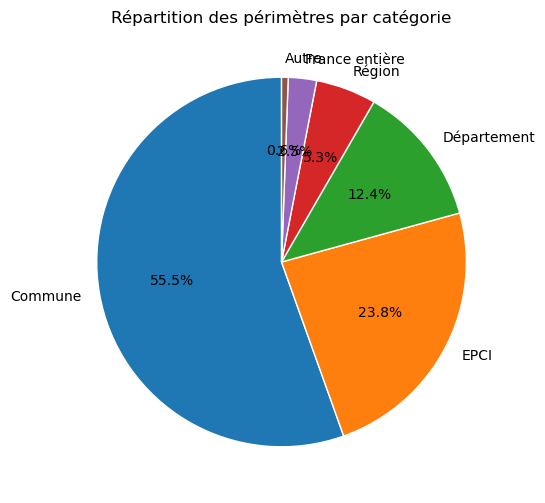

In [ ]:
plt.figure()
df['categorie'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Répartition des périmètres par catégorie')
plt.ylabel('')
plt.show()

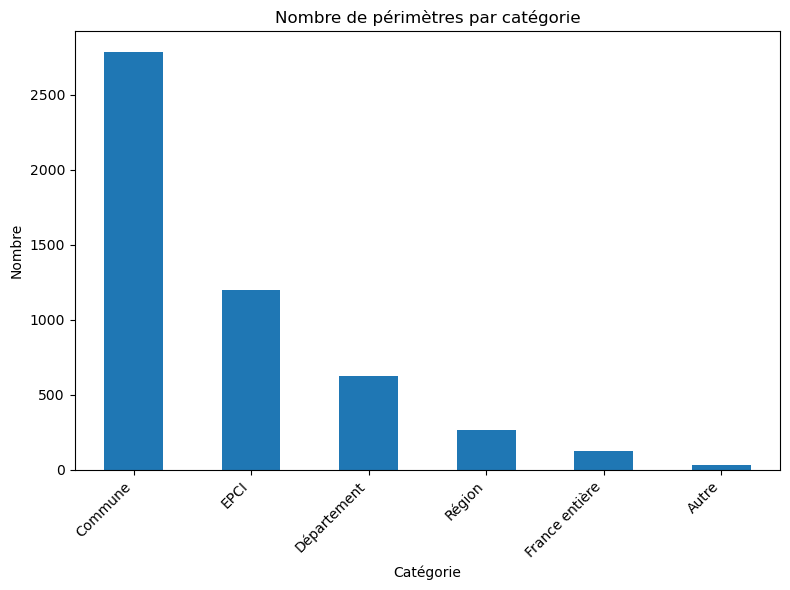

In [ ]:
plt.figure()
df['categorie'].value_counts().plot(kind='bar')
plt.title('Nombre de périmètres par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
stats = (
    df.groupby('categorie')
      .agg(
          total=('categorie', 'size'),
          moy_long_reg=('reg', lambda x: x.map(len).mean()),
          moy_long_dep=('dep', lambda x: x.map(len).mean()),
          moy_long_epci=('epci', lambda x: x.map(len).mean()),
          moy_long_comm=('comm', lambda x: x.map(len).mean()),
      )
)
stats

,total,moy_long_reg,moy_long_dep,moy_long_epci,moy_long_comm
categorie,,,,,
Autre,29,0.00000,0.000000,0.000000,0.000000
Commune,2783,0.00000,0.000000,0.000000,15.303629
Département,622,0.00000,1.874598,0.027331,2.588424
EPCI,1195,0.00000,0.000000,1.127197,1.546444
France entière,124,0.00000,0.000000,0.000000,0.000000
Région,265,1.29434,0.769811,0.000000,1.716981


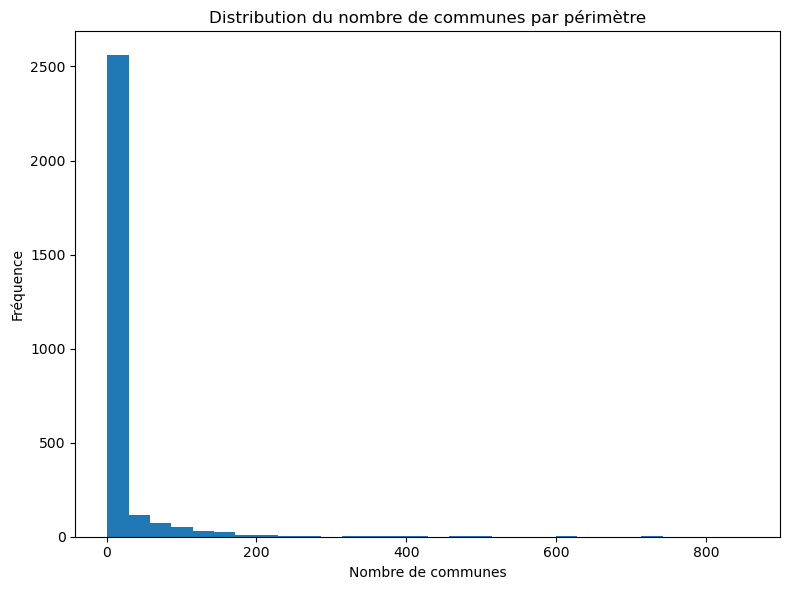

In [ ]:
comm_counts = df['comm'].map(len)
if (comm_counts > 0).any():
    plt.figure()
    comm_counts[comm_counts > 0].plot(kind='hist', bins=30)
    plt.title('Distribution du nombre de communes par périmètre')
    plt.xlabel('Nombre de communes')
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()
else:
    print("Aucun périmètre ne contient de communes enregistrées.")

In [ ]:
unique_regs = set(code for lst in df['reg'] for code in lst)
unique_deps = set(code for lst in df['dep'] for code in lst)
unique_epci = set(code for lst in df['epci'] for code in lst)
unique_comm = set(code for lst in df['comm'] for code in lst)

print(f"Régions uniques : {len(unique_regs):d}\n" 
      f"Départements uniques : {len(unique_deps):d}\n" 
      f"EPCI uniques : {len(unique_epci):d}\n" 
      f"Communes uniques : {len(unique_comm):d}")

Régions uniques : 18
Départements uniques : 101
EPCI uniques : 1055
Communes uniques : 25009
